## Install requirements txt file 
    pip install -r requirements_1.5.txt

## Import libraries

In [7]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\valev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\valev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\valev\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
# need another import
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\valev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [40]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\valev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

## 4.	Load the twentieth-century data that you scraped in Exercise 1.4

In [8]:
# Import txt file

with open('key_events_20th_century.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

## 5.	Tokenize the words from the text and create a bar chart to plot the 10 most common words

In [16]:
# verify that data is indeed a string
type(data)

str

In [14]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'era', 'The', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 'of', 'inventions', ',', 'including', 'the

In [17]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4721 samples and 21901 outcomes>


In [18]:
dist_words.most_common(10)

[('.', 1626),
 ('the', 1116),
 (',', 975),
 ('of', 612),
 ('and', 408),
 ('to', 325),
 ('The', 319),
 ('[', 309),
 (']', 309),
 ('in', 298)]

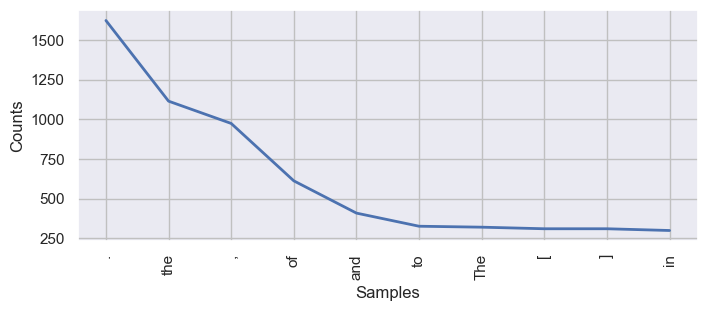

In [19]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## 6.	Remove stop words (and punctuation marks if necessary), and rerun the plot. What has changed? Comment on your impressions in a markdown cell under the plot.

In [20]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'any', 'into', 'be', 'because', 's', "they're", 'about', 'does', 've', "you've", 'after', 'too', "she'd", 'few', "should've", 'own', 'some', "won't", 'what', "he'd", 'have', 'are', 'both', 'been', 'their', 'wasn', "they'd", 'has', 'now', 'doing', 'don', "couldn't", 'i', "doesn't", 'before', 'between', 'but', 'did', 'mightn', 't', 'to', 'd', 'you', "she's", 'of', 'y', 'under', 'couldn', 'she', 'these', 'down', 'can', "i've", "it'd", 'how', 'himself', "needn't", 'its', 'as', 'shouldn', "aren't", "we're", 'weren', 'ma', 'so', "weren't", 'his', 'm', 'for', "hadn't", 'again', 'my', 'below', 'each', "isn't", 'aren', "don't", 'or', "haven't", 'out', 'me', 'from', 'where', 'hasn', 'isn', 'shan', 'nor', 'by', 'if', 'most', 'through', 'him', 'once', 'having', 'when', 'it', "he's", "wasn't", "we'd", 'very', 'which', 'ours', 'whom', 're', "we'll", 'he', 'is', "it'll", 'those', 'being', 'itself', 'the', 'yourself', 'theirs', "that'll", 'until', 'had', "i'd", "i'm", "you'd", 'ain', 'over', 'yours',

In [21]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [22]:
filtered_words

['The',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today',
 '.',
 'Historic',
 'events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'World',
 'beginning',
 'century',
 '[',
 'edit',
 ']',
 'Main',
 'article',
 ':',
 'Edwardian',
 'era',
 'The',
 'new',
 'beginning',
 '20th',
 'century',
 'marked',
 'significant',
 'changes',
 '.',
 'The',
 '1900s',
 'saw',
 'decade',
 'herald',
 'series',
 'inventions',
 ',',
 'including',
 'automobile',
 ',',
 'airplane',
 'radio',
 'broadcasting',
 '.',
 '1914',
 'saw',
 'completion',
 'Panama',
 'Canal',
 '.',
 'The',
 'Scramble',
 'Africa',
 'conti

In [23]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4618 samples and 17186 outcomes>


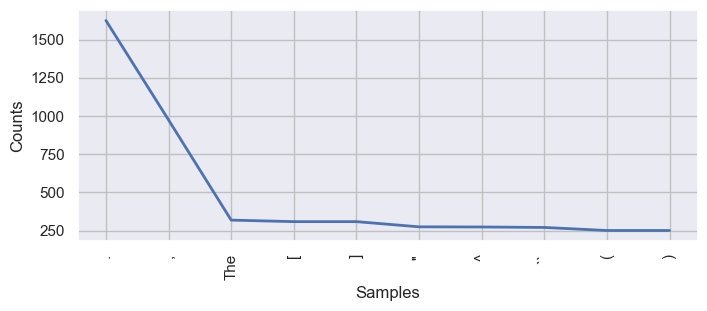

In [24]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [25]:
dist_words_filter

FreqDist({'.': 1626, ',': 975, 'The': 319, '[': 309, ']': 309, "''": 275, '^': 274, '``': 271, '(': 251, ')': 251, ...})

In [26]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [27]:
sans_punc

'  The      th    century    changed    world    unprecedented    ways         The    World    Wars    sparked    tension    countries    led    creation    atomic    bombs         Cold    War    led    Space    Race    creation    space based    rockets         World    Wide    Web    created         These    advancements    played    significant    role    citizens         lives    shaped      st    century    today         Historic    events      th    century         edit         World    beginning    century         edit         Main    article         Edwardian    era    The    new    beginning      th    century    marked    significant    changes         The        s    saw    decade    herald    series    inventions         including    automobile         airplane    radio    broadcasting                 saw    completion    Panama    Canal         The    Scramble    Africa    continued        s    resulted    wars    genocide    across    continent         The    atrocities  

In [28]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['The', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'The', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'saw', 'completion', 'Panama', 'Canal', 'The', 'Scramble', 'Africa', 'continued', 's', 'resulted', 'wars', 'genocide', 'across', 'continent', 'The', 'atrocities', 'Congo', 'Free', 'State', 'shocked', 'civilized', 'world', 'From', 'First', 'World', 'War', 'aftermath', '

In [29]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

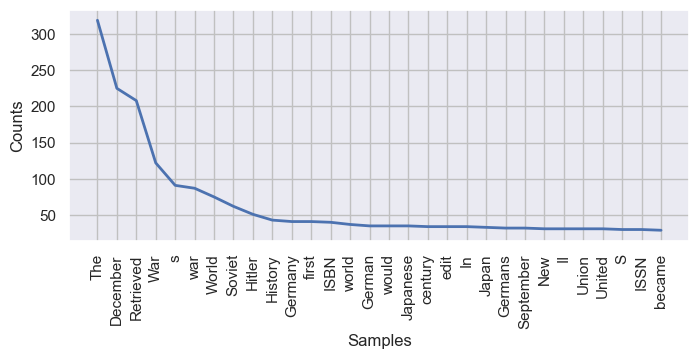

In [30]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

### The plot excludes stopwords and punctuation marks, however, it still includes words like "The", "s", "ISBN", "in" that are not necessarily helpful.  

In [31]:
dist_words_filter_2.most_common(20)

[('The', 319),
 ('December', 225),
 ('Retrieved', 208),
 ('War', 122),
 ('s', 91),
 ('war', 87),
 ('World', 75),
 ('Soviet', 62),
 ('Hitler', 51),
 ('History', 43),
 ('Germany', 41),
 ('first', 41),
 ('ISBN', 40),
 ('world', 37),
 ('German', 35),
 ('would', 35),
 ('Japanese', 35),
 ('century', 34),
 ('edit', 34),
 ('In', 34)]

In [115]:
new_stopwords = ["The", "s", 'ISBN', 'In', 'th', 'e', 'on', 'com']

In [116]:
filtered = []
for word in dist_words_filter_2:
    if word not in new_stopwords:
        filtered.append(word)

## 7.	Create a tags list using TextBlob.

In [117]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 2.23 ms


In [118]:
text

TextBlob("['December', 'Retrieved', 'War', 'war', 'World', 'Soviet', 'Hitler', 'History', 'Germany', 'first', 'world', 'German', 'would', 'Japanese', 'century', 'edit', 'Japan', 'Germans', 'September', 'New', 'II', 'Union', 'United', 'S', 'ISSN', 'became', 'July', 'also', 'August', 'Europe', 'U', 'States', 'A', 'nuclear', 'June', 'Battle', 'American', 'April', 'weapons', 'October', 'new', 'Africa', 'end', 'history', 'This', 'attack', 'Stalin', 'Holocaust', 'BBC', 'British', 'one', 'Britain', 'May', 'North', 'Main', 'Allies', 'many', 'Nazi', 'two', 'forces', 'Allied', 'could', 'doi', 'p', 'countries', 'France', 'However', 'Jews', 'later', 'On', 'January', 'Cold', 'Space', 'South', 'Berlin', 'February', 'computer', 'led', 'November', 'people', 'invasion', 'Internet', 'How', 'Press', 'York', 'article', 'From', 'Great', 'known', 'nations', 'made', 'state', 'Italy', 'Army', 'battle', 'Pacific', 'National', 'Archived', 'original', 'First', 'power', 'After', 'used', 'government', 'time', 'beg

In [121]:
tags_list = text.tags

In [122]:
tags_list

[('[', 'JJ'),
 ("'December", 'NNP'),
 ("'", 'POS'),
 ("'Retrieved", 'VBD'),
 ("'War", 'NNP'),
 ("'", 'POS'),
 ("'war", 'NNP'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Soviet", 'NNP'),
 ("'", 'POS'),
 ("'Hitler", 'NNP'),
 ("'", 'POS'),
 ("'History", 'NNP'),
 ("'", 'POS'),
 ("'", 'POS'),
 ("'first", 'NNP'),
 ("'", 'POS'),
 ("'world", 'NNP'),
 ("'", 'POS'),
 ("'German", 'NNP'),
 ("'", 'POS'),
 ("'would", 'MD'),
 ("'Japanese", 'JJ'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'edit", 'NNP'),
 ("'", 'POS'),
 ("'", 'POS'),
 ("'Germans", 'NNS'),
 ("'", 'POS'),
 ("'September", 'NNP'),
 ("'", 'POS'),
 ("'New", 'NNP'),
 ("'", 'POS'),
 ("'II", 'NNP'),
 ("'", 'POS'),
 ("'Union", 'NN'),
 ("'United", 'VBD'),
 ("'S", 'POS'),
 ("'ISSN", 'NNP'),
 ("'", 'POS'),
 ("'July", 'NNP'),
 ("'", 'POS'),
 ("'also", 'NNP'),
 ("'", 'POS'),
 ("'August", 'NNP'),
 ("'", 'POS'),
 ('U', 'NNP'),
 ("'", 'POS'),
 ("'States", 'NNS'),
 ("'", 'POS'),
 ('A', 'NNP'),
 ("'", 'POS'),
 ("'June", 'NNP'),
 ("'", 'POS'),
 

## 8.	Create a list of the Top 10 POS tags for words that appear in the article.

In [123]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [124]:
df_text.head()

,Words,Word type
0,[,JJ
1,'December,NNP
2,',POS
3,'Retrieved,VBD
4,'War,NNP


In [125]:
df_t = df_text.groupby('Word type').count().reset_index()

In [126]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,34
2,DT,5
3,EX,10
4,FW,17


In [127]:
top10 = df_t.nlargest(20, 'Words')

## 9.	Plot this list in a bar chart using the seaborn library. 

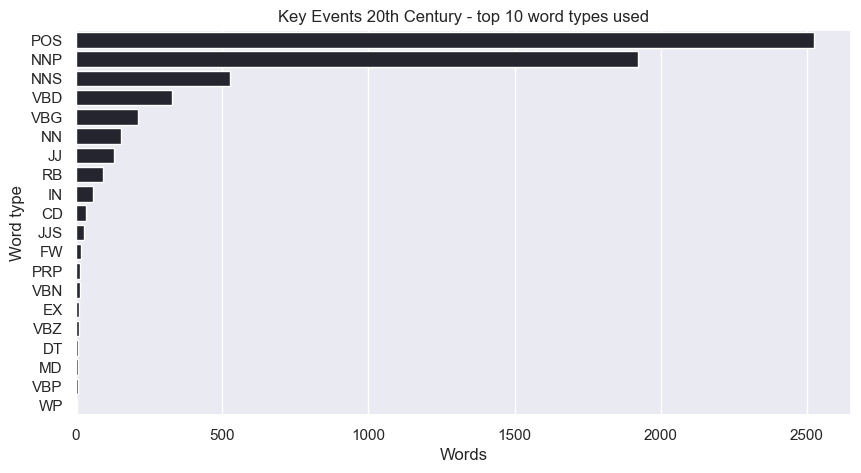

In [128]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("Key Events 20th Century - top 10 word types used")

### 10.	Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives. Analyzing the results—what do you think stands out in these frequencies? Comment on your impressions in a Markdown cell under the plot.

In [129]:
#Check for case sensitivity
df_text['Words'] = df_text['Words'].str.lower()

In [130]:
# Remove punctuation and special characters
df_text['Words'] = df_text['Words'].str.replace(r'[^\w\s]', '', regex=True)

### Nouns

In [131]:
df_noun = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df_noun.columns = ["Word", "Occurences"]
x = df_noun.groupby('Word').count().reset_index()
y = x.sort_values(by =['Occurences'], ascending=False)
top15_noun = y.nlargest(15, 'Occurences')

In [132]:
top15_noun

,Word,Occurences
1483,online,3
2198,war,3
1979,strategic,2
1959,station,2
1486,open,2
395,companies,2
392,communism,2
391,communications,2
385,commercial,2
384,command,2


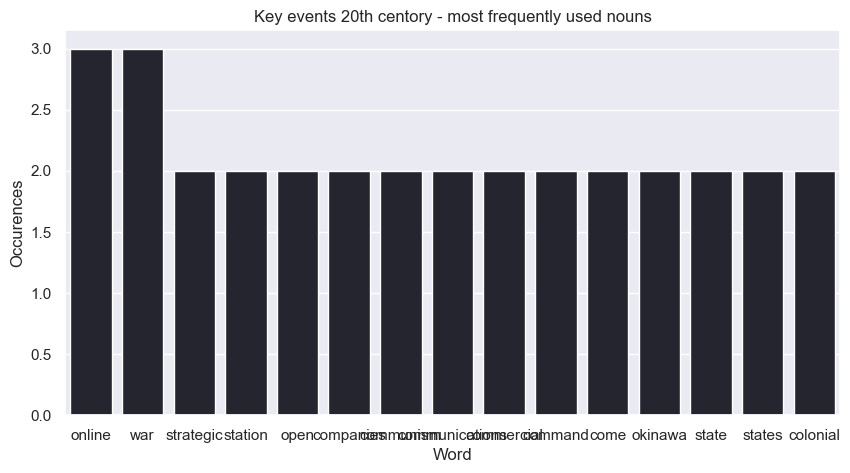

In [133]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_noun).set_title("Key events 20th centory - most frequently used nouns")

### Verbs

In [134]:
df_verb = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df_verb.columns = ["Word", "Occurences"]
x = df_verb.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_verb = y.nlargest(15, 'Occurences')

In [135]:
top15_verb

,Word,Occurences
161,liberated,2
20,assured,2
133,hundred,2
37,caused,2
39,changed,2
44,combined,2
197,planned,2
115,failed,2
257,started,2
110,explained,2


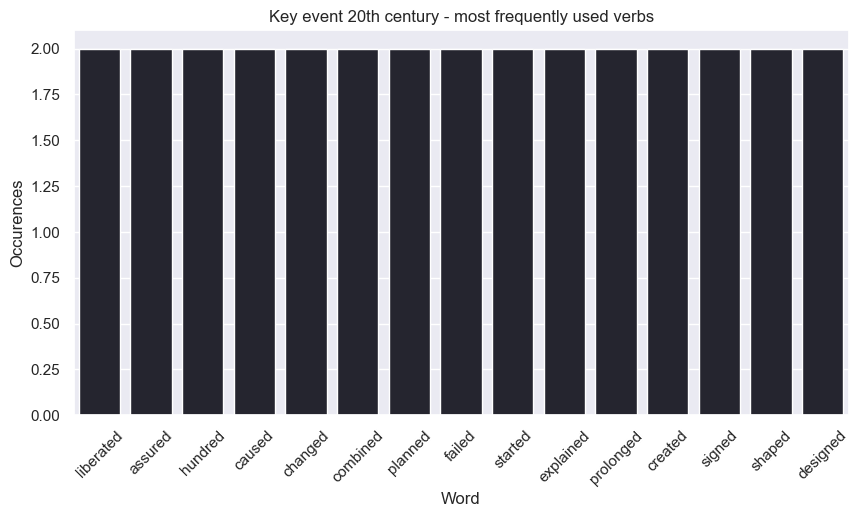

In [138]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15_verb).set_title("Key event 20th century - most frequently used verbs")
    plt.xticks(rotation=45) 

### Adjectives

In [139]:
df_adjective = df_text[df_text['Word type'] == "JJ"]
df_adjective.columns = ["Word", "Occurences"]
x = df_adjective.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15_adjective = y.nlargest(15, 'Occurences')

In [140]:
top15_adjective

,Word,Occurences
46,historical,2
49,incredible,2
30,democratic,2
84,religious,2
40,gamble,2
99,table,2
20,bubble,2
79,political,2
87,reusable,2
68,much,2


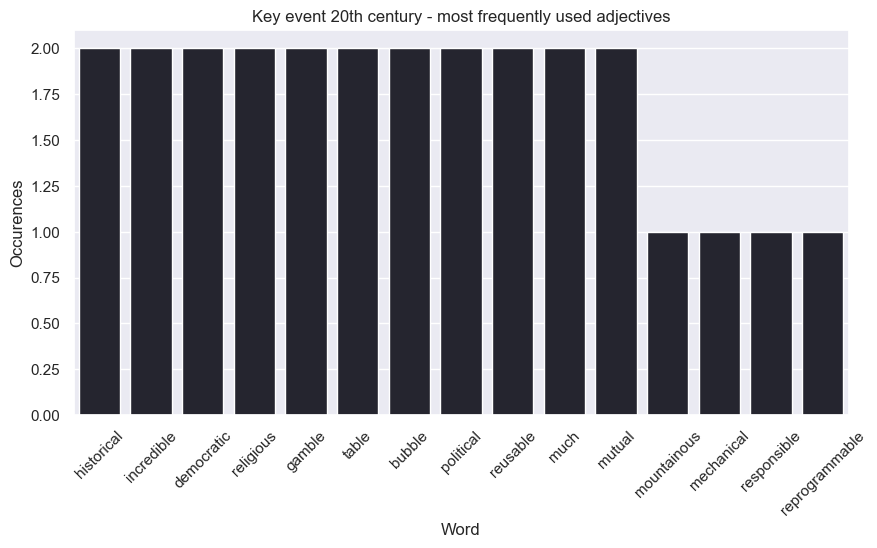

In [142]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15_adjective).set_title("Key event 20th century - most frequently used adjectives")
    plt.xticks(rotation=45) 

### Each of the top15 only show one or two counts of the word, however, I can find more in the text.
### I removed punctuation and special characters, added more words to stopwords and re-ran code.  The counts went from all "1" to "2" and "3"

## 11.	Create a dataframe with the countries and the number of times they’re mentioned in your text (remember—you’ll need to use the countries lookup list if you didn’t scrape one in the previous task).

In [144]:
# Load country names
df_countries = pd.read_csv("countries_list_20th_century_1.5.csv")
country_list = df_countries['country_name'].str.strip().str.lower().tolist()

In [150]:
# Lowercase and clean the text
text_clean = text.lower()


In [153]:
text_str = str(text_clean)

country_mentions = {
    country: text_str.count(country)
    for country in country_list
    if text_str.count(country) > 0
}


In [154]:
df_mentions = pd.DataFrame(list(country_mentions.items()), columns=['Country', 'Mentions'])
df_mentions = df_mentions.sort_values(by='Mentions', ascending=False).reset_index(drop=True)

In [155]:
df_mentions

,Country,Mentions
0,russia,4
1,vietnam,2
2,cambodia,2
3,latvia,2
4,kenya,2
...,...,...
58,iraq,1
59,israel,1
60,italy,1
61,albania,1


## 12.	Create a plot showing the frequency of the number of times these countries are mentioned in the text. Is there anything in particular you notice in this plot? Describe your findings in a Markdown cell underneath the plot.

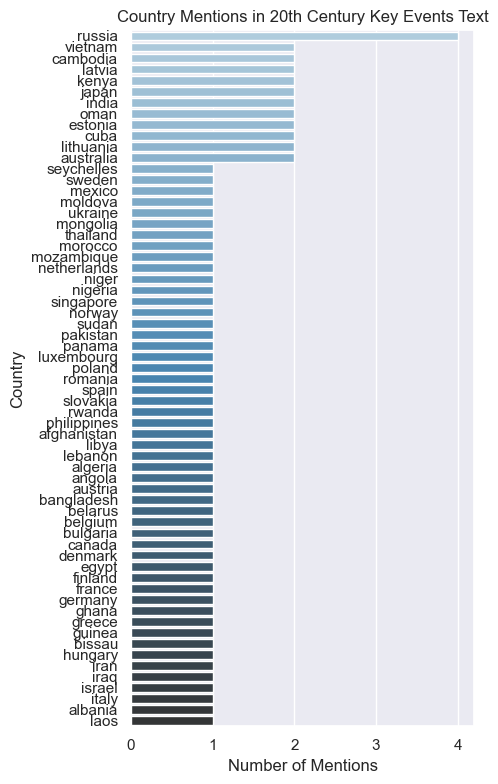

In [161]:
plt.figure(figsize=(5, 8))
sns.barplot(x='Mentions', y='Country', data=df_mentions, hue = 'Country', palette='Blues_d')

plt.title("Country Mentions in 20th Century Key Events Text")
plt.xlabel("Number of Mentions")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### There have to be more mentions than a max of 4 (Russia)! Germany has one single mention.  Something is wrong. 

### Bonus Task
Create a sentiment analysis of the twentieth-century key events from the text you scraped. Before running it, write down what your expectations are in terms of the scores. After you get the result, note whether they were correct. Then, create plots to visualize the scores as shown in the notebook for this Exercise.

In [162]:
# Combine list of text into one string
text_blob = TextBlob(" ".join(filtered))

# Get sentiment
print("Polarity:", text_blob.sentiment.polarity)        # Range: [-1, 1]
print("Subjectivity:", text_blob.sentiment.subjectivity) # Range: [0, 1]

Polarity: 0.026709873884618766
Subjectivity: 0.4393330542756567


In [163]:
# Sentiment for each event
sentiments = [
    {
        "event": text,
        "polarity": TextBlob(text).sentiment.polarity,
        "subjectivity": TextBlob(text).sentiment.subjectivity
    }
    for text in filtered
]

df_sentiment = pd.DataFrame(sentiments)

# Show or plot top positive/negative events
df_sentiment.sort_values(by='polarity', ascending=True).head(5)  # Most negative
df_sentiment.sort_values(by='polarity', ascending=False).head(5) # Most positive


,event,polarity,subjectivity
865,best,1.0,0.3
3776,Best,1.0,0.3
3297,Greatest,1.0,1.0
984,greatest,1.0,1.0
3956,brilliant,0.9,1.0
